##READ FILES AND CHARTS##

##BASELINE##

In [1]:
#LEER ARCHIVO CON PREDICCIONES DE BASE LINE
import json

# Nombre del archivo JSON que deseas leer
file_name = "json_validatedata_files/data_baseline_bert-base-cased-squad2.json"

# Abrir el archivo en modo lectura
with open(file_name, 'r') as archivo_json:
    # Cargar los datos JSON del archivo en una estructura de datos de Python
    baseline_results = json.load(archivo_json)
print(baseline_results[6])

{'answer_predicted': 'daily', 'answer_true': 'Sarna topical every day apply to affected areas, multivitamin daily, Coumadin 2.5 mg daily,'}


In [2]:
from sklearn.metrics import precision_recall_fscore_support

# Obtener las respuestas predecidas y las respuestas verdaderas
predicted_answers = [item['answer_predicted'] for item in baseline_results]
true_answers = [item['answer_true'] for item in baseline_results]

# Calcular precisión, recall y F1-score con manejo de división por cero
precision, recall, f1, _ = precision_recall_fscore_support(true_answers, predicted_answers, average='weighted', zero_division=0.0)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.01
Recall: 0.00
F1-Score: 0.00


In [3]:
import pandas as pd

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(baseline_results)

# Visualizar el DataFrame
print(df_results.head())

        answer_predicted                                        answer_true
0      Diabetes Mellitus                          Glyburide 5 mg p.o. q.d.,
1              discharge  daily, CellCept 1500 mg b.i.d., Protonix 20 mg...
2            medications  lasix, and nebs for wheezing, and was monitore...
3      renal medications  Hematology: He received heparin for DVT prophy...
4  decreased p.o. intake  result of Percocet taken for his left hip pain...


In [4]:
#METRICAS BASELINE
import re
#Exact Match
em = []
for result in baseline_results:
    #print(result['answer_predicted'])
    #print(result['answer_true'])
    pred = re.sub('[^0-9a-z ]', '', result['answer_predicted'].lower())
    true = re.sub('[^0-9a-z ]', '', result['answer_true'].lower())
    if pred == true:
        em.append(1)
    else:
        em.append(0)

average = sum(em)/len(em)
print("Exact match:")
print(average)
print('\n')

Exact match:
0.028345398454442713




In [5]:
#ROUGE
from rouge import Rouge
model_out = [ans['answer_predicted'] for ans in baseline_results]
reference = [ans['answer_true'] for ans in baseline_results]
clean = re.compile('(?i)[^0-9a-z ]')
model_out = [clean.sub('', text.lower()) for text in model_out]
reference = [clean.sub('', text.lower()) for text in reference]

for i, o in enumerate(model_out):
    if o == "":
        model_out[i] = "vacio"
#print("Model Output:", model_out)
#print("Type of Model Output:", type(model_out))
#print(len(model_out))
#print("\nReference:", reference)
#print("Type of Reference:", type(reference))
#print(len(reference))

rouge = Rouge()
#print("Hola")
result_rouge = rouge.get_scores(model_out, reference)
#print("Hola2")
result_rouge_avg = rouge.get_scores(model_out, reference, avg=true)
scores = rouge.get_scores(model_out, reference)
#print("ROUGE:")
#print(result_rouge)
print("ROUGE AVERAGE:")
print(result_rouge_avg)
indice = 8
print(f"rouge[{indice}]:")
print(model_out[indice], '|', reference[indice], '|', scores[indice]['rouge-1']['f'])
print('\n')

ROUGE AVERAGE:
{'rouge-1': {'r': 0.17144361487905863, 'p': 0.36714593377747806, 'f': 0.21277285185130737}, 'rouge-2': {'r': 0.11903762077925291, 'p': 0.2530821688569323, 'f': 0.14752511091016463}, 'rouge-l': {'r': 0.1698949568129978, 'p': 0.364873521478034, 'f': 0.21104992330367403}}
rouge[8]:
he has a chronic osteomyelitis | to insulin with his standing doses of lantus with a lispro | 0.13333332888888905




In [6]:
import numpy as np
#F1-Score
#RECALL = count(match reference y model gram n)/count(reference gram n)
#recall = [print(x) for x in [1,2,3,4,5,6] if x < 5]
list_ref = []
print("F1-SCORE:\n")

#print("Reference:")
for ref in reference:
    split_ref = ref.split()
    list_ref.append(split_ref)

#print(list_ref)

list_model = []
#print("\nModel:")
for model in model_out:
    split_model = model.split()
    list_model.append(split_model)
    
#print(list_model)
#print(list_model[0])
i = 0
list_match = []
for phrase in list_ref:
    count = 0
    for word in phrase:
        if word in list_model[i]:
            count = count + 1
    list_match.append(count)
    i = i+1

list_countref = []
list_countmodel = []
#count ngram
for phrase in list_ref:
    list_countref.append(len(phrase))
for phrase in list_model:
    list_countmodel.append(len(phrase))
#print("\nCount words ref:")
#print(list_countref)
#print("\nCount words model:")
#print(list_countmodel)
#print("\nCount words match:")
#print(list_match)

import numpy as np

match = np.array(list_match)
count_ref = np.array(list_countref)
count_model = np.array(list_countmodel)

array_recall = match/count_ref
array_precision = match/count_model
print("\nRecall array:")
print(array_recall)
print("\nPrecision array:")
print(array_precision)

num = 2*array_precision*array_recall
den = array_precision + array_recall

f1_score = num/den
print("\nF1-Score:")
print(f1_score)
print(type(f1_score))

# Reemplazar los valores nan por 0.0
my_array_no_nan = np.nan_to_num(f1_score, nan=0.0)
print(type(my_array_no_nan))
# Convertir el numpy array a una lista
f1_score_list_baseline = my_array_no_nan.tolist()
print(type(f1_score_list_baseline))

F1-SCORE:


Recall array:
[0. 0. 0. ... 0. 0. 0.]

Precision array:
[0. 0. 0. ... 0. 0. 0.]

F1-Score:
[nan nan nan ... nan nan nan]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>


C:\Users\eladio\AppData\Local\Temp\ipykernel_31212\2112667539.py:63: RuntimeWarning: invalid value encountered in divide
  f1_score = num/den


In [7]:
filtered_list = [score for score in f1_score_list_baseline if score <= 1.0]

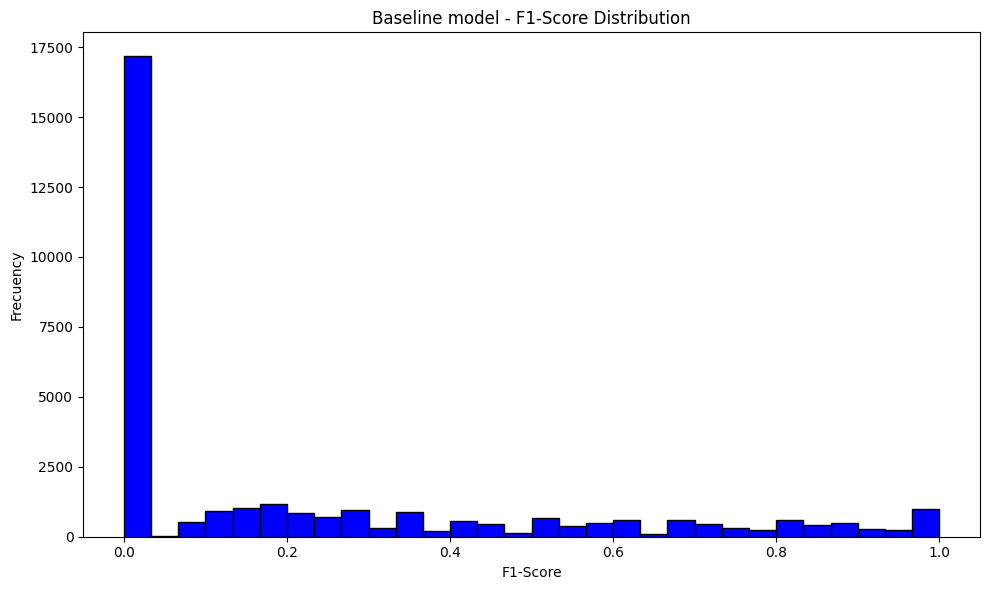

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

list_aux = filtered_list #f1_score_list_baseline

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(list_aux, bins=30, color='blue', edgecolor='black')  # Experimenta con el número de bins
# Añadir etiquetas y título
plt.xlabel('F1-Score')
plt.ylabel('Frecuency')
plt.title('Baseline model - F1-Score Distribution')

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('figures/histogram_baseline.png')
plt.show()

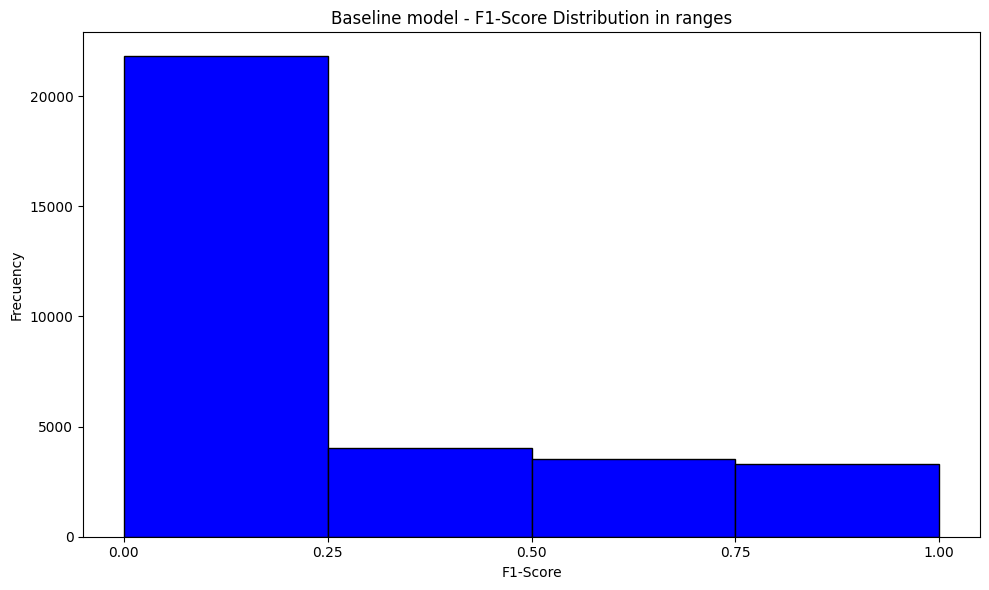

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
list_aux = f1_score_list_baseline
# Dividir los datos en los rangos deseados
bins = [0, 0.25, 0.5, 0.75, 1.0]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(list_aux, bins=bins, color='blue', edgecolor='black') 

# Añadir etiquetas y título
plt.xlabel('F1-Score')
plt.ylabel('Frecuency')
plt.title('Baseline model - F1-Score Distribution in ranges')

# Establecer manualmente las ubicaciones de las marcas y las etiquetas en el eje x
plt.xticks(np.arange(0, 1.25, 0.25))

# Añadir leyenda con los rangos
#plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('figures/histogram_baseline_ranges.png')
plt.show()


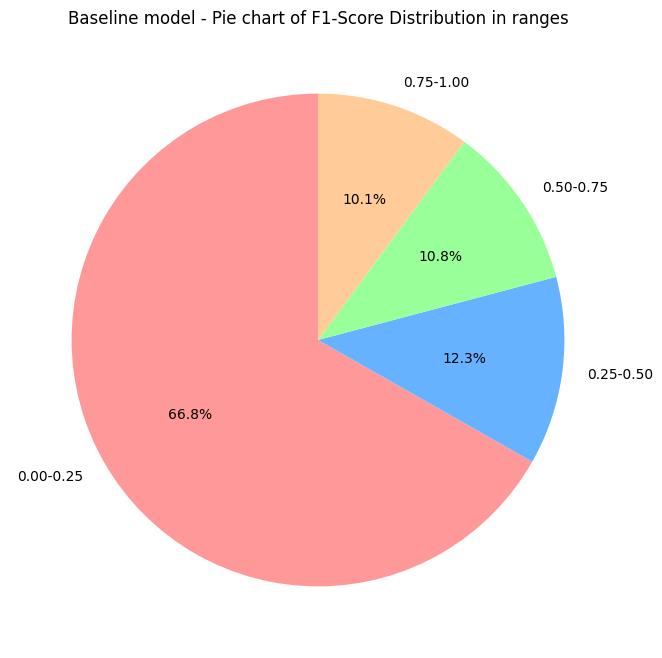

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Supongamos que 'list_aux' contiene tus datos
list_aux = f1_score_list_baseline

# Dividir los datos en los rangos deseados
bins = [0, 0.25, 0.5, 0.75, 1.0]

# Calcular la frecuencia de cada rango
hist, _ = np.histogram(list_aux, bins=bins)

# Etiquetas para los segmentos
labels = [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)]

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(hist, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Baseline model - Pie chart of F1-Score Distribution in ranges')

# Mostrar el gráfico
plt.show()

##MODELO PROPIO##

In [10]:
#LEER ARCHIVO CON PREDICCIONES DE MODELO PROPIO------------------------------------------------------------------------------------
import json

# Nombre del archivo JSON que deseas leer
file_name = "json_validatedata_files/data_validation.json"

# Abrir el archivo en modo lectura
with open(file_name, 'r') as archivo_json:
    # Cargar los datos JSON del archivo en una estructura de datos de Python
    evaluation_results = json.load(archivo_json)
print(evaluation_results[8])

{'answer_predicted': 'insulin with his standing doses of Lantus with a lispro', 'answer_true': 'to insulin with his standing doses of Lantus with a lispro'}


In [11]:
from sklearn.metrics import precision_recall_fscore_support

# Obtener las respuestas predecidas y las respuestas verdaderas
predicted_answers = [item['answer_predicted'] for item in evaluation_results]
true_answers = [item['answer_true'] for item in evaluation_results]

# Calcular precisión, recall y F1-score con manejo de división por cero
precision, recall, f1, _ = precision_recall_fscore_support(true_answers, predicted_answers, average='weighted', zero_division=0.0)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.31
Recall: 0.31
F1-Score: 0.30


In [12]:
import pandas as pd

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(evaluation_results)

# Visualizar el DataFrame
print(df_results.head())

                      answer_predicted  \
0  covered with insulin sliding scale,   
1                                    ,   
2        lasix, and nebs for wheezing,   
3      Hematology: He received heparin   
4                               result   

                                         answer_true  
0                          Glyburide 5 mg p.o. q.d.,  
1  daily, CellCept 1500 mg b.i.d., Protonix 20 mg...  
2  lasix, and nebs for wheezing, and was monitore...  
3  Hematology: He received heparin for DVT prophy...  
4  result of Percocet taken for his left hip pain...  


In [13]:
#METRICAS
import re
#Exact Match
em = []
for result in evaluation_results:
    #print(result['answer_predicted'])
    #print(result['answer_true'])
    pred = re.sub('[^0-9a-z ]', '', result['answer_predicted'].lower())
    true = re.sub('[^0-9a-z ]', '', result['answer_true'].lower())
    if pred == true:
        em.append(1)
    else:
        em.append(0)

average = sum(em)/len(em)
print("Exact match:")
print(average)
print('\n')

Exact match:
0.31283789975258863




In [14]:
#ROUGE
from rouge import Rouge
model_out = [ans['answer_predicted'] for ans in evaluation_results]
reference = [ans['answer_true'] for ans in evaluation_results]
clean = re.compile('(?i)[^0-9a-z ]')
model_out = [clean.sub('', text.lower()) for text in model_out]
reference = [clean.sub('', text.lower()) for text in reference]

for i, o in enumerate(model_out):
    if o == "":
        model_out[i] = "vacio"
#print("Model Output:", model_out)
#print("Type of Model Output:", type(model_out))
#print(len(model_out))
#print("\nReference:", reference)
#print("Type of Reference:", type(reference))
#print(len(reference))

rouge = Rouge()
#print("Hola")
result_rouge = rouge.get_scores(model_out, reference)
#print("Hola2")
result_rouge_avg = rouge.get_scores(model_out, reference, avg=true)
scores = rouge.get_scores(model_out, reference)
#print("ROUGE:")
#print(result_rouge)
print("ROUGE AVERAGE:")
print(result_rouge_avg)
indice = 8
print(f"rouge[{indice}]:")
print(model_out[indice], '|', reference[indice], '|', scores[indice]['rouge-1']['f'])
print('\n')

ROUGE AVERAGE:
{'rouge-1': {'r': 0.42348033241048977, 'p': 0.7039549166805661, 'f': 0.4662210223127514}, 'rouge-2': {'r': 0.3695380963204681, 'p': 0.4467235792535897, 'f': 0.3891879728294991}, 'rouge-l': {'r': 0.42301449399454066, 'p': 0.703039361817884, 'f': 0.46562804075192493}}
rouge[8]:
insulin with his standing doses of lantus with a lispro | to insulin with his standing doses of lantus with a lispro | 0.9473684160664821




In [15]:
import numpy as np
#F1-Score
#RECALL = count(match reference y model gram n)/count(reference gram n)
#recall = [print(x) for x in [1,2,3,4,5,6] if x < 5]
list_ref = []
print("F1-SCORE:\n")

#print("Reference:")
for ref in reference:
    split_ref = ref.split()
    list_ref.append(split_ref)

#print(list_ref)

list_model = []
#print("\nModel:")
for model in model_out:
    split_model = model.split()
    list_model.append(split_model)
    
#print(list_model)
#print(list_model[0])
i = 0
list_match = []
for phrase in list_ref:
    count = 0
    for word in phrase:
        if word in list_model[i]:
            count = count + 1
    list_match.append(count)
    i = i+1

list_countref = []
list_countmodel = []
#count ngram
for phrase in list_ref:
    list_countref.append(len(phrase))
for phrase in list_model:
    list_countmodel.append(len(phrase))
#print("\nCount words ref:")
#print(list_countref)
#print("\nCount words model:")
#print(list_countmodel)
#print("\nCount words match:")
#print(list_match)

import numpy as np

match = np.array(list_match)
count_ref = np.array(list_countref)
count_model = np.array(list_countmodel)

array_recall = match/count_ref
array_precision = match/count_model
print("\nRecall array:")
print(array_recall)
print("\nPrecision array:")
print(array_precision)

num = 2*array_precision*array_recall
den = array_precision + array_recall

f1_score = num/den
print("\nF1-Score:")
print(f1_score)
print(type(f1_score))

# Reemplazar los valores nan por 0.0
my_array_no_nan = np.nan_to_num(f1_score, nan=0.0)
print(type(my_array_no_nan))
# Convertir el numpy array a una lista
f1_score_list_medical_field = my_array_no_nan.tolist()
print(type(f1_score_list_medical_field))

F1-SCORE:


Recall array:
[0.         0.         0.7        ... 0.11111111 0.63636364 0.        ]

Precision array:
[0.    0.    1.4   ... 1.    0.875 0.   ]

F1-Score:
[       nan        nan 0.93333333 ... 0.2        0.73684211        nan]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>


C:\Users\eladio\AppData\Local\Temp\ipykernel_31212\1374299104.py:63: RuntimeWarning: invalid value encountered in divide
  f1_score = num/den


In [16]:
# Eliminar valores mayores a 1.0
filtered_list = [score for score in f1_score_list_medical_field if score <= 1.0]

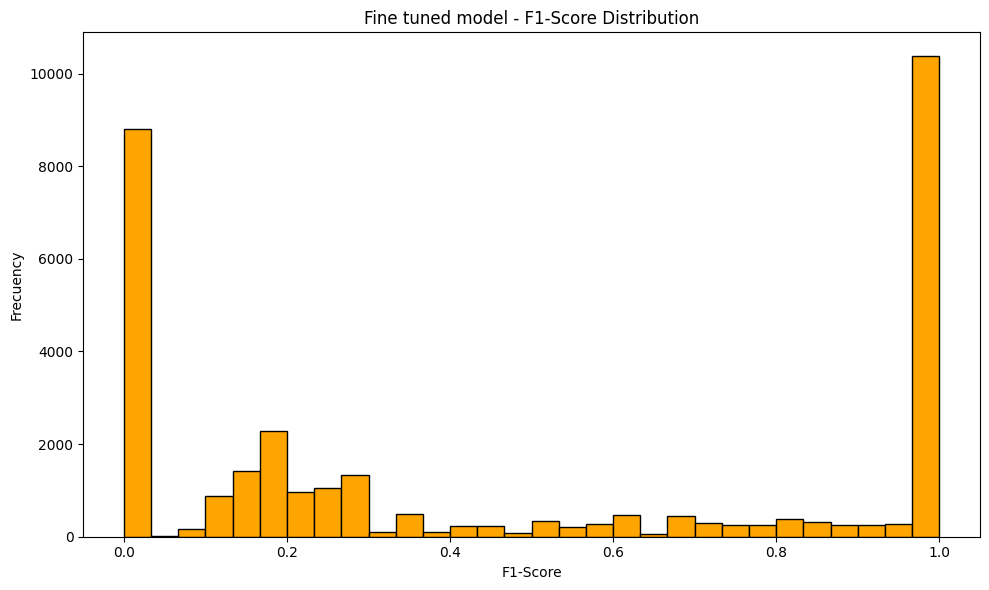

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

list_aux = filtered_list#f1_score_list_medical_field

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(list_aux, bins=30, color='orange', edgecolor='black')  # Experimenta con el número de bins
# Añadir etiquetas y título
plt.xlabel('F1-Score')
plt.ylabel('Frecuency')
plt.title('Fine tuned model - F1-Score Distribution')

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('figures/histogram_finetuned.png')
plt.show()


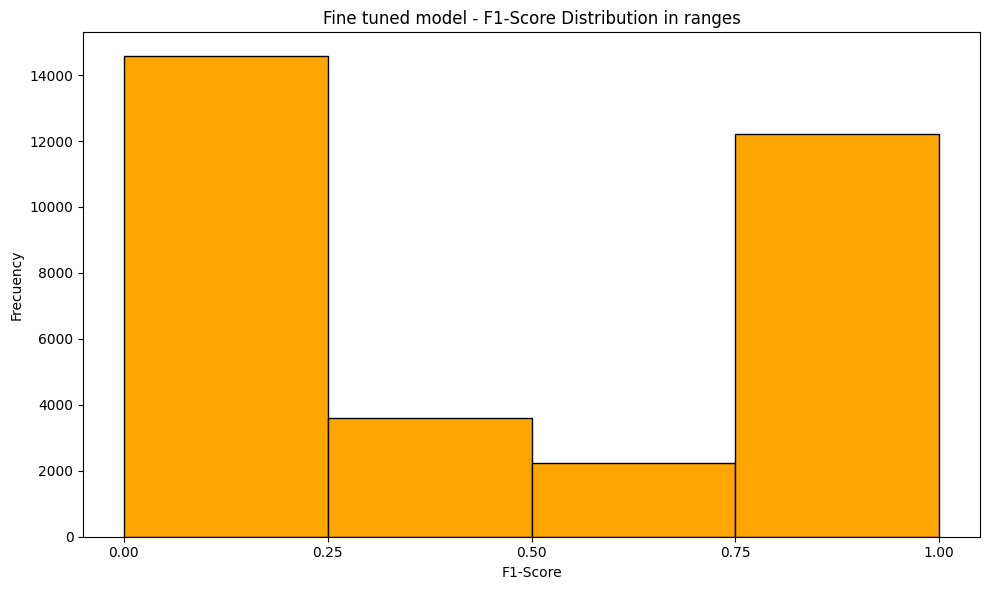

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
list_aux = f1_score_list_medical_field
# Dividir los datos en los rangos deseados
bins = [0, 0.25, 0.5, 0.75, 1.0]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(list_aux, bins=bins, color='orange', edgecolor='black') 

# Añadir etiquetas y título
plt.xlabel('F1-Score')
plt.ylabel('Frecuency')
plt.title('Fine tuned model - F1-Score Distribution in ranges')

# Establecer manualmente las ubicaciones de las marcas y las etiquetas en el eje x
plt.xticks(np.arange(0, 1.25, 0.25))

# Añadir leyenda con los rangos
#plt.legend(['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0'])

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('figures/histogram_finetuned_ranges.png')
plt.show()

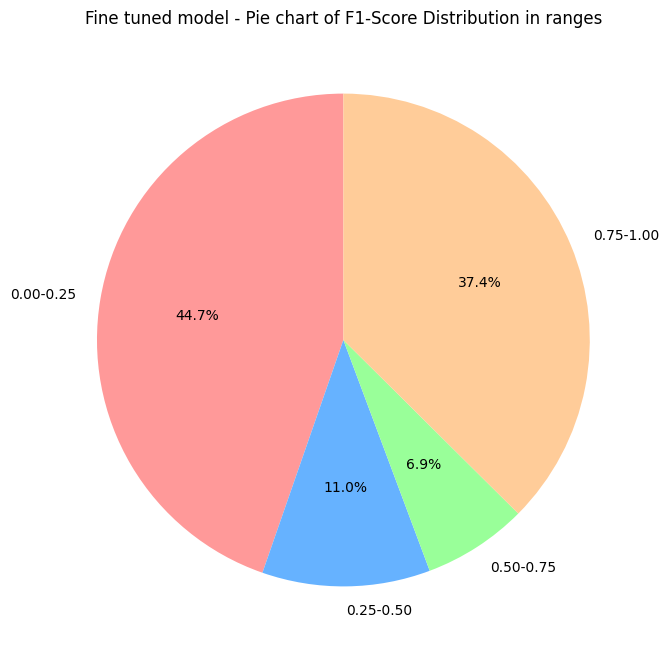

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Supongamos que 'list_aux' contiene tus datos
list_aux = f1_score_list_medical_field

# Dividir los datos en los rangos deseados
bins = [0, 0.25, 0.5, 0.75, 1.0]

# Calcular la frecuencia de cada rango
hist, _ = np.histogram(list_aux, bins=bins)

# Etiquetas para los segmentos
labels = [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)]

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(hist, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Fine tuned model - Pie chart of F1-Score Distribution in ranges')
# Mostrar el gráfico
plt.show()

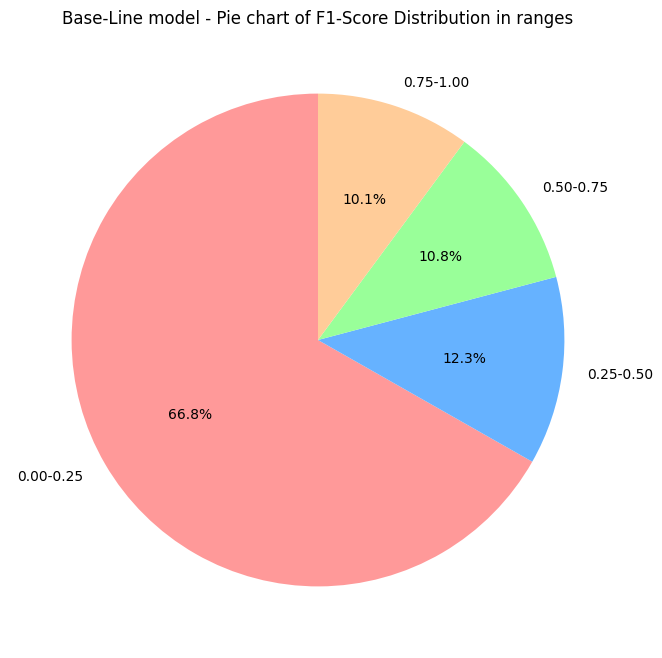

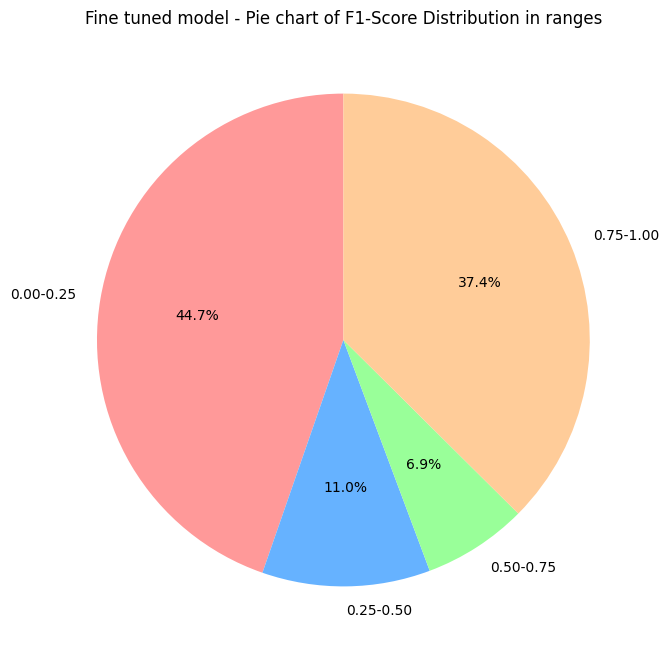

In [20]:
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplázalos con tus listas reales)
list_1 = f1_score_list_baseline
list_2 = f1_score_list_medical_field

# Gráfica de torta para list_1
# Dividir los datos en los rangos deseados
bins = [0, 0.25, 0.5, 0.75, 1.0]
# Calcular la frecuencia de cada rango
hist, _ = np.histogram(list_1, bins=bins)
# Etiquetas para los segmentos
labels = [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)]
# Crear el gráfico de torta
#plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
plt.pie(hist, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Base-Line model - Pie chart of F1-Score Distribution in ranges')
plt.savefig('figures/piechart_baseline.png')
#plt.subplot(1, 2, 2)

# Gráfica de torta para list_2
# Dividir los datos en los rangos deseados
bins = [0, 0.25, 0.5, 0.75, 1.0]
# Calcular la frecuencia de cada rango
hist, _ = np.histogram(list_2, bins=bins)
# Etiquetas para los segmentos
labels = [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)]
# Crear el gráfico de torta
#plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 2)
plt.pie(hist, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Fine tuned model - Pie chart of F1-Score Distribution in ranges')
plt.savefig('figures/piechart_finetuned.png')
plt.show()


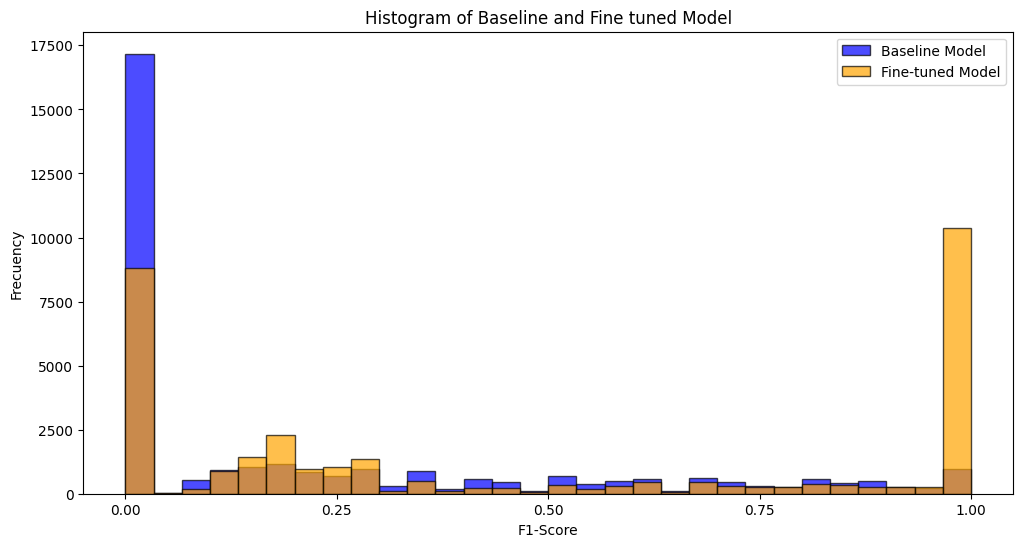

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplázalos con tus listas reales)
list_1 = [score for score in f1_score_list_baseline if score <= 1.0]
list_2 = [score for score in f1_score_list_medical_field if score <= 1.0]

# Crear histograma para list_1
plt.figure(figsize=(12, 6))
plt.hist(list_1, bins=30, color='blue', alpha=0.7, edgecolor='black', label='Baseline Model')
plt.hist(list_2, bins=30, color='orange', alpha=0.7, edgecolor='black', label='Fine-tuned Model')

plt.xlabel('F1-Score')
plt.ylabel('Frecuency')
plt.title('Histogram of Baseline and Fine tuned Model')
# Establecer manualmente las ubicaciones de las marcas y las etiquetas en el eje x
plt.xticks(np.arange(0, 1.25, 0.25))
plt.legend()
# Guardar la gráfica como PNG
plt.savefig('figures/histogram_baseline_and_finetuned.png')
plt.show()


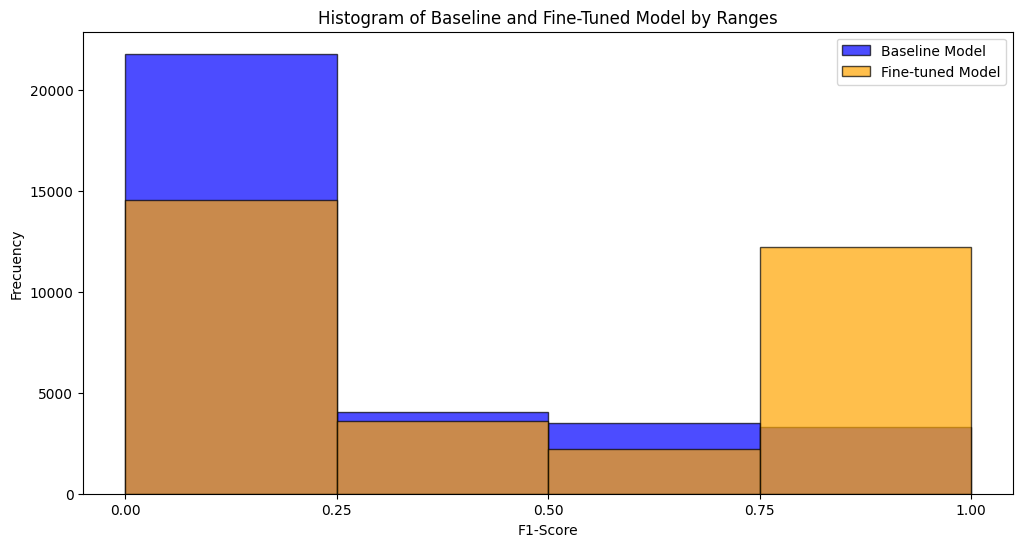

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplázalos con tus listas reales)
list_1 = f1_score_list_baseline
list_2 = f1_score_list_medical_field
# Dividir los datos en los rangos deseados
bins = [0, 0.25, 0.5, 0.75, 1.0]

# Crear histograma para list_1
plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)
plt.hist(list_1, bins=bins, color='blue', alpha=0.7, edgecolor='black', label='Baseline Model')
plt.hist(list_2, bins=bins, color='orange', alpha=0.7, edgecolor='black', label='Fine-tuned Model')

# Encontrar la intersección de los histogramas
#intersection_values, _ = np.histogram(list(set(list_1) & set(list_2)), bins=bins)
#plt.hist(intersection_values, bins=bins, color='purple', alpha=0.7, label='Intersection')


plt.xlabel('F1-Score')
plt.ylabel('Frecuency')
plt.title('Histogram of Baseline and Fine-Tuned Model by Ranges')
# Establecer manualmente las ubicaciones de las marcas y las etiquetas en el eje x
plt.xticks(np.arange(0, 1.25, 0.25))
plt.legend()
# Añadir leyenda con los rangos
#plt.legend(['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0'])
# Guardar la gráfica como PNG
plt.savefig('figures/histogram_baseline_and_finetuned_ranges.png')
plt.show()